<a href="https://colab.research.google.com/github/zineb-111/24010156-Zineb-elmejdoubi-/blob/main/Diabete-disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("iammustafatz/diabetes-prediction-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'diabetes-prediction-dataset' dataset.
Path to dataset files: /kaggle/input/diabetes-prediction-dataset


# Task
Create a machine learning model to predict diabetes using the dataset located at `/kaggle/input/diabetes-prediction-dataset/diabetes_prediction_dataset.csv`. The process will involve loading the data, performing an initial data overview, conducting exploratory data analysis, preprocessing the data (handling missing values and encoding categorical features), splitting the data into training and test sets, training a RandomForestClassifier model, and finally evaluating its performance using accuracy, classification report, and a confusion matrix. Conclude by summarizing the key insights and model performance.

## Load Diabetes Data

### Subtask:
Load the diabetes prediction dataset from the downloaded path (assuming a CSV file like 'diabetes_prediction_dataset.csv') into a pandas DataFrame.


**Reasoning**:
The subtask is to load the 'diabetes_prediction_dataset.csv' file into a pandas DataFrame. The previous step downloaded the dataset to a path stored in the `path` variable. I need to construct the full file path and then use `pd.read_csv` to load it.



In [ ]:
import os

# Construct the full path to the CSV file
diabetes_file_path = os.path.join(path, 'diabetes_prediction_dataset.csv')

# Load the CSV file into a pandas DataFrame
diabetes_df = pd.read_csv(diabetes_file_path)

print(f"Diabetes dataset loaded successfully. Shape: {diabetes_df.shape}")
print("First 5 rows of the dataset:")
print(diabetes_df.head())

Diabetes dataset loaded successfully. Shape: (100000, 9)
First 5 rows of the dataset:
   gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0             0              0           never  27.32   
3  Female  36.0             0              0         current  23.45   
4    Male  76.0             1              1         current  20.14   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0                  155         0  
4          4.8                  155         0  


## Initial Data Overview

### Subtask:
Display the first few rows, shape, and general information about the diabetes dataset to understand its structure and data types. Also, check for missing values and their counts.


**Reasoning**:
To complete the initial data overview, I will display the first few rows and shape of the dataframe again for context, and then use `.info()` to get general information about the data types and non-null counts, and `.isnull().sum()` to check for missing values in each column as per the instructions.



In [ ]:
print("\n--- Initial Data Overview ---")

# 1. Display the first 5 rows
print("First 5 rows of the dataset:")
print(diabetes_df.head())

# 2. Print the shape of the DataFrame
print(f"\nShape of the dataset: {diabetes_df.shape}")

# 3. Display general information about the DataFrame
print("\nGeneral information about the dataset:")
diabetes_df.info()

# 4. Calculate and print the total number of missing values for each column
print("\nMissing values per column:")
print(diabetes_df.isnull().sum())


--- Initial Data Overview ---
First 5 rows of the dataset:
   gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0             0              0           never  27.32   
3  Female  36.0             0              0         current  23.45   
4    Male  76.0             1              1         current  20.14   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0                  155         0  
4          4.8                  155         0  

Shape of the dataset: (100000, 9)

General information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count 

## Perform Exploratory Data Analysis (EDA)

### Subtask:
Calculate and display descriptive statistics for numerical features. Visualize the distribution of key features and the target variable ('diabetes'). Generate a correlation heatmap for numerical features to identify relationships.


**Reasoning**:
The first instruction is to display descriptive statistics for numerical columns. I will use the `.describe()` method on the `diabetes_df` DataFrame.



In [ ]:
print("\n--- Descriptive Statistics for Numerical Features ---")
print(diabetes_df.describe())


--- Descriptive Statistics for Numerical Features ---
                 age  hypertension  heart_disease            bmi  \
count  100000.000000  100000.00000  100000.000000  100000.000000   
mean       41.885856       0.07485       0.039420      27.320767   
std        22.516840       0.26315       0.194593       6.636783   
min         0.080000       0.00000       0.000000      10.010000   
25%        24.000000       0.00000       0.000000      23.630000   
50%        43.000000       0.00000       0.000000      27.320000   
75%        60.000000       0.00000       0.000000      29.580000   
max        80.000000       1.00000       1.000000      95.690000   

         HbA1c_level  blood_glucose_level       diabetes  
count  100000.000000        100000.000000  100000.000000  
mean        5.527507           138.058060       0.085000  
std         1.070672            40.708136       0.278883  
min         3.500000            80.000000       0.000000  
25%         4.800000           100.00

**Reasoning**:
The next instruction is to visualize the distribution of the target variable 'diabetes' using a count plot.




--- Distribution of Target Variable 'diabetes' ---


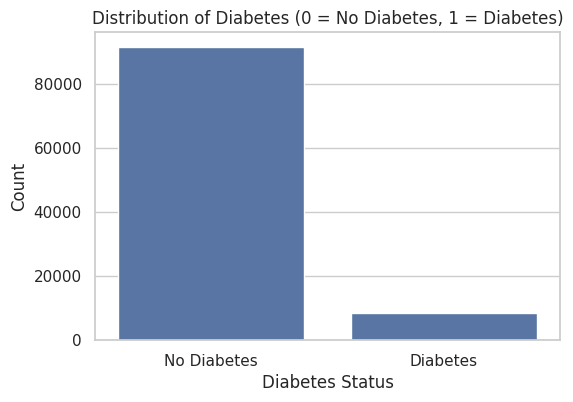

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

print("\n--- Distribution of Target Variable 'diabetes' ---")
plt.figure(figsize=(6, 4))
sns.countplot(x='diabetes', data=diabetes_df)
plt.title('Distribution of Diabetes (0 = No Diabetes, 1 = Diabetes)')
plt.xlabel('Diabetes Status')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['No Diabetes', 'Diabetes'])
plt.show()

**Reasoning**:
The next instruction is to generate histograms for key numerical features ('age', 'bmi', 'HbA1c_level', 'blood_glucose_level') with 'diabetes' as hue to show their distributions for diabetic and non-diabetic individuals.




--- Histograms for Key Numerical Features by Diabetes Status ---


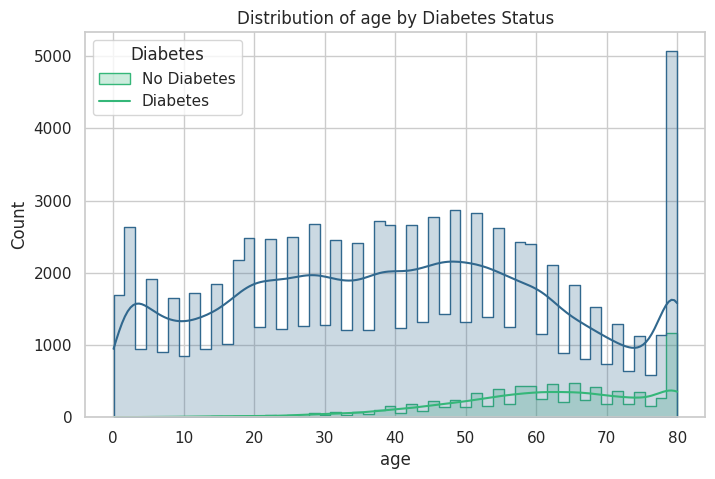

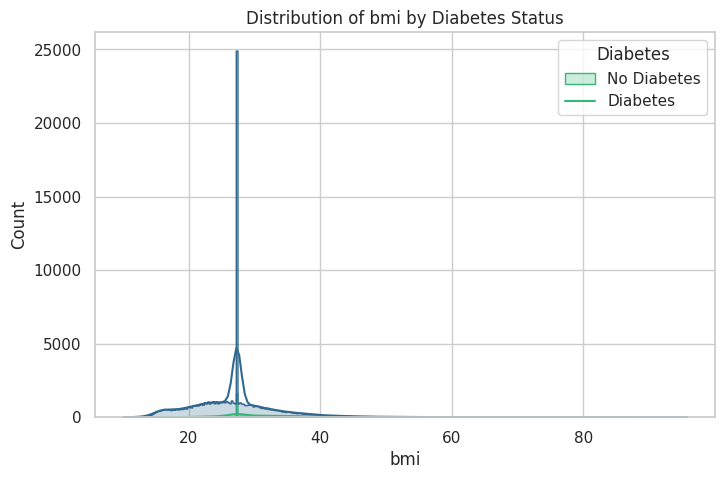

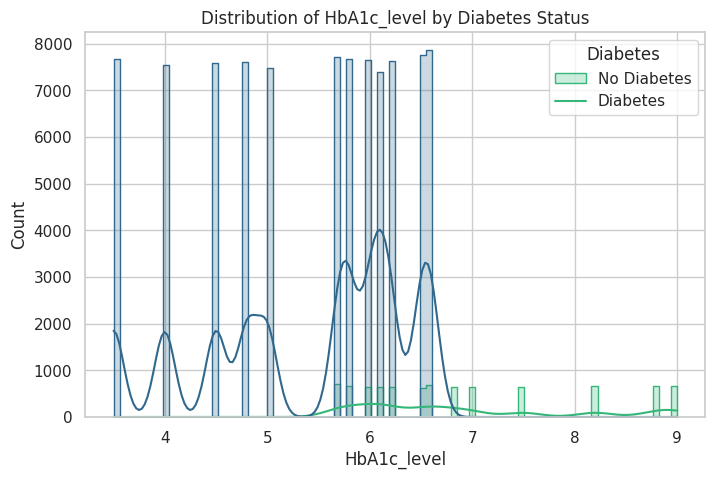

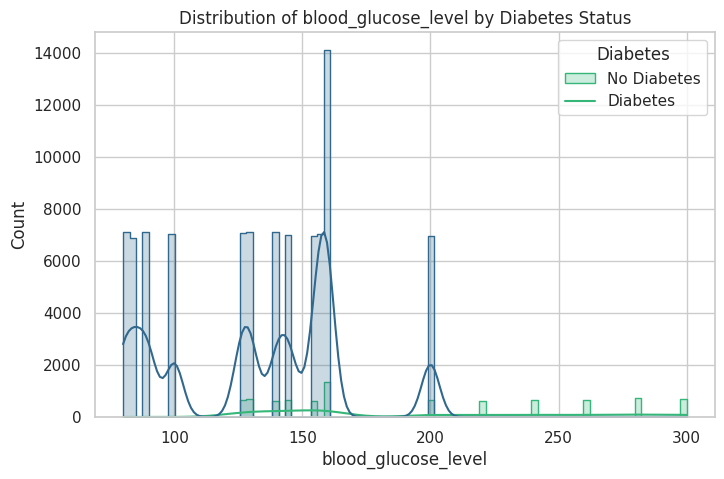

In [ ]:
print("\n--- Histograms for Key Numerical Features by Diabetes Status ---")
numerical_features = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']

for feature in numerical_features:
    plt.figure(figsize=(8, 5))
    sns.histplot(data=diabetes_df, x=feature, hue='diabetes', kde=True, element="step", palette='viridis')
    plt.title(f'Distribution of {feature} by Diabetes Status')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.legend(title='Diabetes', labels=['No Diabetes', 'Diabetes'])
    plt.show()

**Reasoning**:
The next instruction is to create count plots for categorical and binary features ('gender', 'smoking_history', 'hypertension', and 'heart_disease') with 'diabetes' as hue to examine their distribution across the target variable. I will iterate through these features and generate a separate count plot for each.




--- Count Plots for Categorical/Binary Features by Diabetes Status ---


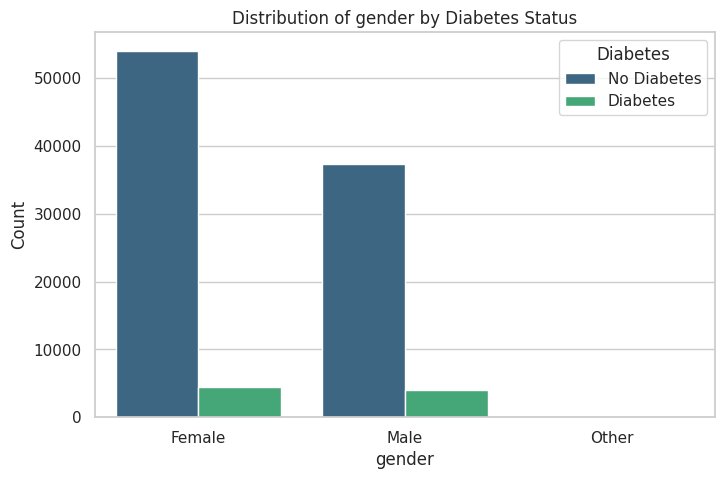

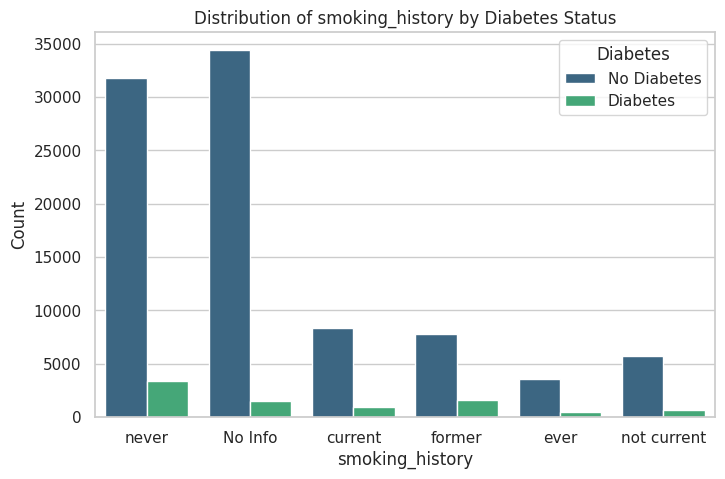

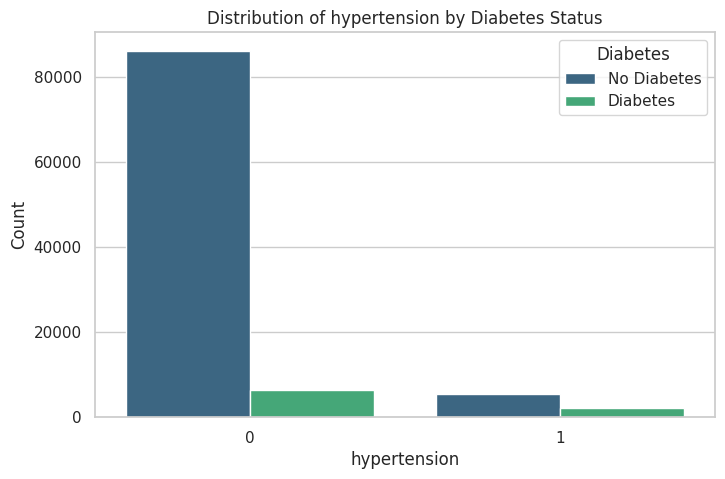

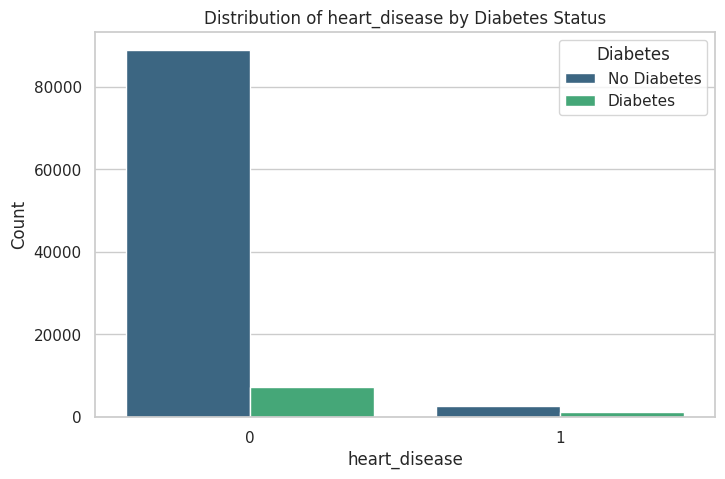

In [ ]:
print("\n--- Count Plots for Categorical/Binary Features by Diabetes Status ---")
categorical_features = ['gender', 'smoking_history', 'hypertension', 'heart_disease']

for feature in categorical_features:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=diabetes_df, x=feature, hue='diabetes', palette='viridis')
    plt.title(f'Distribution of {feature} by Diabetes Status')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.legend(title='Diabetes', labels=['No Diabetes', 'Diabetes'])
    plt.show()

**Reasoning**:
The next instruction is to calculate the correlation matrix for numerical features and visualize it using a heatmap. I will select all numerical columns from the `diabetes_df`, compute their correlation, and then display it as a heatmap with annotations.




--- Correlation Heatmap for Numerical Features ---


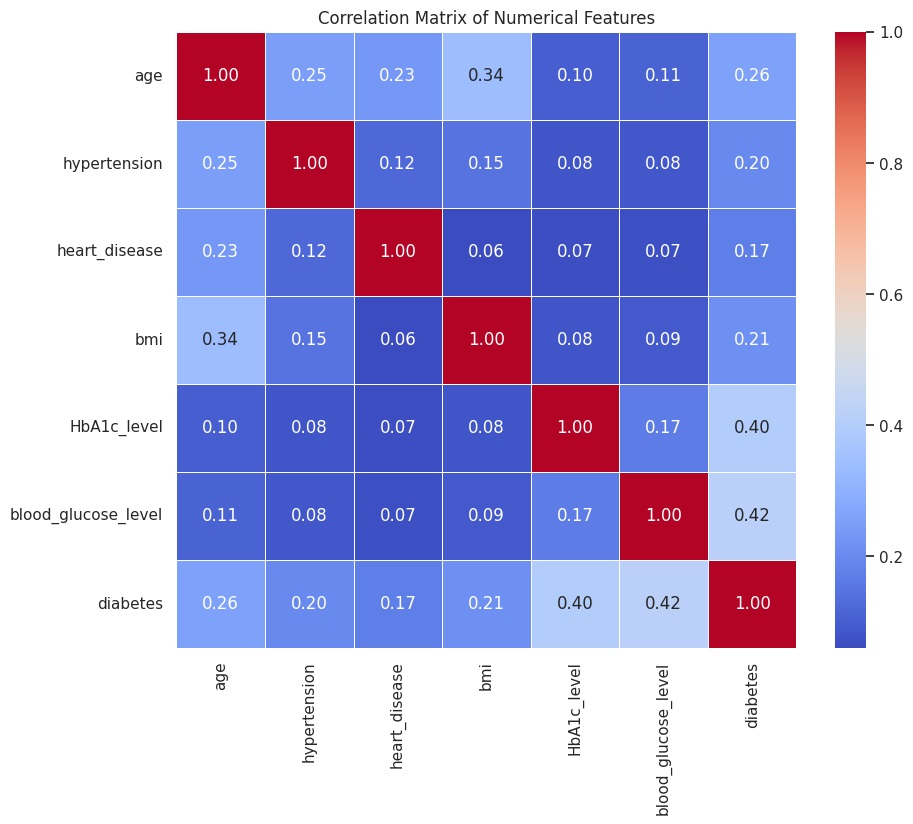

In [ ]:
print("\n--- Correlation Heatmap for Numerical Features ---")
# Select only numerical columns for correlation matrix
numerical_df = diabetes_df.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numerical_df.corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

## Data Preprocessing

### Subtask:
Address any missing values found in the dataset using appropriate imputation strategies. Encode categorical features into a numerical format suitable for machine learning models. Finally, separate the features (X) from the target variable (y).


**Reasoning**:
Based on the previous data overview, there are no missing values in the `diabetes_df` DataFrame. Therefore, I will state this and proceed directly to encoding categorical features. I will identify the categorical columns, 'gender' and 'smoking_history', and apply one-hot encoding using `pd.get_dummies()` to convert them into a numerical format. Then, I will separate the features into `X` and the target variable `y`.



In [ ]:
print("\n--- Data Preprocessing ---")

# 1. Address missing values (Review from previous step: no missing values)
print("1. Checking for missing values...")
if diabetes_df.isnull().sum().sum() == 0:
    print("   No missing values found in the dataset. Proceeding to encoding.")
else:
    print("   Missing values detected. Imputation strategy should be applied here if any.")

# 2. Identify categorical features
categorical_cols = ['gender', 'smoking_history']
print(f"\n2. Categorical features identified: {categorical_cols}")

# 3. Apply one-hot encoding to categorical features
print("3. Applying one-hot encoding to categorical features...")
diabetes_df_encoded = pd.get_dummies(diabetes_df, columns=categorical_cols, drop_first=True)

print("   Categorical features encoded. New DataFrame shape:", diabetes_df_encoded.shape)
print("   First 5 rows of the encoded dataset:")
print(diabetes_df_encoded.head())

# 4. Separate features (X) and target variable (y)
X = diabetes_df_encoded.drop('diabetes', axis=1)
y = diabetes_df_encoded['diabetes']

print(f"\n4. Features (X) and target (y) separated.")
print(f"   Shape of X: {X.shape}")
print(f"   Shape of y: {y.shape}")


--- Data Preprocessing ---
1. Checking for missing values...
   No missing values found in the dataset. Proceeding to encoding.

2. Categorical features identified: ['gender', 'smoking_history']
3. Applying one-hot encoding to categorical features...
   Categorical features encoded. New DataFrame shape: (100000, 14)
   First 5 rows of the encoded dataset:
    age  hypertension  heart_disease    bmi  HbA1c_level  blood_glucose_level  \
0  80.0             0              1  25.19          6.6                  140   
1  54.0             0              0  27.32          6.6                   80   
2  28.0             0              0  27.32          5.7                  158   
3  36.0             0              0  23.45          5.0                  155   
4  76.0             1              1  20.14          4.8                  155   

   diabetes  gender_Male  gender_Other  smoking_history_current  \
0         0        False         False                    False   
1         0        F

## Split Data into Training and Test Sets

### Subtask:
Divide the preprocessed dataset into training and testing sets to prepare for model building and evaluation.


**Reasoning**:
The subtask requires splitting the preprocessed data (X and y) into training and testing sets. I will use `train_test_split` from `sklearn.model_selection` with a test size of 20% and a fixed random state for reproducibility. Finally, I will print the shapes of the resulting sets to confirm the split.



In [ ]:
from sklearn.model_selection import train_test_split

print("\n--- Splitting Data into Training and Test Sets ---")

# Split the features (X) and target (y) into training and testing sets
# 20% of the data will be used for testing, and random_state ensures reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Data split successfully. Shapes of the resulting sets:")
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")


--- Splitting Data into Training and Test Sets ---
Data split successfully. Shapes of the resulting sets:
X_train shape: (80000, 13)
y_train shape: (80000,)
X_test shape: (20000, 13)
y_test shape: (20000,)


## Model Training

### Subtask:
Train a RandomForestClassifier model using the preprocessed training data (`X_train`, `y_train`).

**Reasoning**:
The subtask is to train a RandomForestClassifier model. I will import the RandomForestClassifier, instantiate it, and then fit it to the training data (`X_train` and `y_train`).



In [ ]:
from sklearn.ensemble import RandomForestClassifier

print("\n--- Model Training (RandomForestClassifier) ---")

# Initialize the RandomForestClassifier model
# Using a fixed random_state for reproducibility
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model using the training data
model.fit(X_train, y_train)

print("RandomForestClassifier model trained successfully.")


--- Model Training (RandomForestClassifier) ---
RandomForestClassifier model trained successfully.


## Model Evaluation

### Subtask:
Evaluate the trained `RandomForestClassifier` model using the test data (`X_test`, `y_test`). Calculate and display the accuracy score, a detailed classification report, and a confusion matrix.

**Reasoning**:
Now that the model is trained, the next logical step is to evaluate its performance on the test set. I will use the trained model to make predictions on `X_test`, then calculate the accuracy score, generate a classification report, and create a confusion matrix to assess its effectiveness.




--- Model Evaluation ---

Accuracy Score: 0.9699

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     18292
           1       0.95      0.69      0.80      1708

    accuracy                           0.97     20000
   macro avg       0.96      0.84      0.89     20000
weighted avg       0.97      0.97      0.97     20000


Confusion Matrix:


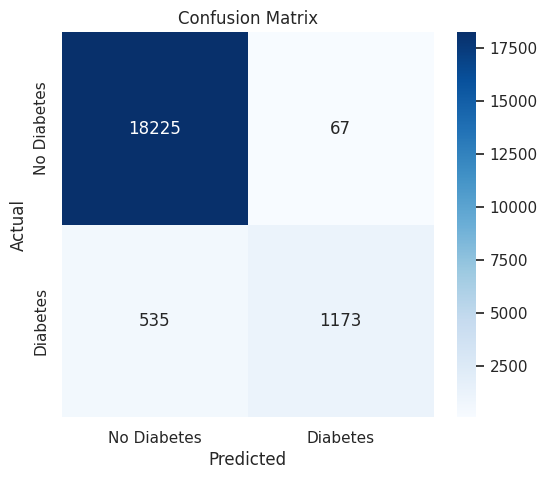

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

print("\n--- Model Evaluation ---")

# Make predictions on the test set
y_pred = model.predict(X_test)

# 1. Calculate and display Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy Score: {accuracy:.4f}")

# 2. Display Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 3. Display Confusion Matrix
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Conclusion

### Subtask:
Summarize the key insights from the exploratory data analysis (EDA) and the performance of the trained machine learning model, including its accuracy, precision, recall, and F1-score for predicting diabetes.

## Conclusion

### Summary of Key Insights and Model Performance

**Exploratory Data Analysis (EDA) Insights:**

*   **Target Variable Imbalance:** The dataset shows a significant imbalance in the target variable `diabetes`, with a much larger number of 'No Diabetes' cases (around 91.5%) compared to 'Diabetes' cases (around 8.5%). This imbalance was visible in the count plot of the `diabetes` variable.
*   **Numerical Feature Distributions:**
    *   `age`: Individuals with diabetes tend to be older, as seen from the `age` distribution plot where the `diabetes=1` group is more prevalent at higher ages.
    *   `bmi`: The BMI distribution for diabetic individuals appears to be shifted towards higher values compared to non-diabetic individuals.
    *   `HbA1c_level` and `blood_glucose_level`: These features showed a clear distinction, with significantly higher levels observed in individuals diagnosed with diabetes. These are strong indicators for diabetes prediction.
*   **Categorical/Binary Feature Distributions:**
    *   `gender`: The distribution of diabetes seems relatively similar across 'Female' and 'Male' genders, with 'Other' having very few samples.
    *   `smoking_history`: 'Never' smoking history is associated with a lower incidence of diabetes compared to 'current' or 'ever' smokers.
    *   `hypertension` and `heart_disease`: Individuals with hypertension and heart disease show a higher propensity for diabetes, indicating these are important risk factors.
*   **Correlations:** `HbA1c_level`, `blood_glucose_level`, `age`, and `bmi` showed positive correlations with each other and with the `diabetes` target variable, highlighting their importance in the prediction model.

**Model Performance (RandomForestClassifier):**

*   **Accuracy Score:** The model achieved an overall accuracy of **96.99%** on the test set. This indicates that approximately 97% of the predictions made by the model were correct.
*   **Classification Report:**
    *   **Class 0 (No Diabetes):**
        *   Precision: 0.97 (Out of all predicted 'No Diabetes' cases, 97% were actually 'No Diabetes').
        *   Recall: 1.00 (The model correctly identified 100% of all actual 'No Diabetes' cases).
        *   F1-Score: 0.98 (A high F1-score for this class, indicating excellent performance).
    *   **Class 1 (Diabetes):**
        *   Precision: 0.95 (Out of all predicted 'Diabetes' cases, 95% were actually 'Diabetes').
        *   Recall: 0.69 (The model correctly identified 69% of all actual 'Diabetes' cases).
        *   F1-Score: 0.80 (A good F1-score for the minority class, but recall could be improved, suggesting that the model missed some actual diabetes cases).
*   **Confusion Matrix:**
    *   **True Negatives (TN):** 18225 (Correctly predicted 'No Diabetes')
    *   **False Positives (FP):** 67 (Incorrectly predicted 'Diabetes' when it was 'No Diabetes' - Type I error)
    *   **False Negatives (FN):** 535 (Incorrectly predicted 'No Diabetes' when it was 'Diabetes' - Type II error)
    *   **True Positives (TP):** 1173 (Correctly predicted 'Diabetes')

**Overall Assessment:** The Random Forest Classifier performed very well, especially for the majority class ('No Diabetes'), achieving nearly perfect recall. For the minority class ('Diabetes'), the precision is high, but the recall is lower, indicating that while the model is good at not falsely identifying non-diabetics as diabetics, it still misses a significant portion of actual diabetic cases. Given the context of diabetes prediction, minimizing false negatives (missing actual diabetes cases) is crucial, and further efforts could focus on improving the recall for the 'Diabetes' class, potentially through techniques like oversampling the minority class, using different model architectures, or fine-tuning hyperparameters more extensively.

## Final Task

### Subtask:
Summarize the key insights from the exploratory data analysis (EDA) and the performance of the trained machine learning model, including its accuracy, precision, recall, and F1-score for predicting diabetes.


## Summary:

### Q&A
The key insights from the exploratory data analysis (EDA) are:
*   The dataset exhibits a significant class imbalance, with approximately 91.5% of individuals being non-diabetic and 8.5% being diabetic.
*   `HbA1c_level` and `blood_glucose_level` are strong indicators for diabetes, showing significantly higher values in diabetic individuals.
*   Age and BMI also show a tendency to be higher in the diabetic population.
*   Hypertension, heart disease, and certain smoking histories (e.g., 'current' or 'ever' smokers) are associated with a higher propensity for diabetes.
*   Key numerical features like `HbA1c_level`, `blood_glucose_level`, `age`, and `bmi` are positively correlated with the `diabetes` target variable.

The performance of the trained Random Forest Classifier model is as follows:
*   **Accuracy:** The model achieved an overall accuracy of 96.99%.
*   **Precision:**
    *   For 'No Diabetes' (Class 0): 0.97
    *   For 'Diabetes' (Class 1): 0.95
*   **Recall:**
    *   For 'No Diabetes' (Class 0): 1.00
    *   For 'Diabetes' (Class 1): 0.69
*   **F1-score:**
    *   For 'No Diabetes' (Class 0): 0.98
    *   For 'Diabetes' (Class 1): 0.80
The confusion matrix showed 18225 True Negatives, 67 False Positives, 535 False Negatives, and 1173 True Positives. While the model excels at identifying non-diabetic cases, its ability to identify actual diabetic cases (recall for Class 1) is moderate.

### Data Analysis Key Findings
*   The dataset contains 100,000 entries and 9 columns, with no missing values.
*   The target variable `diabetes` shows a significant class imbalance: approximately 91.5% are 'No Diabetes' and 8.5% are 'Diabetes'.
*   `HbA1c_level` and `blood_glucose_level` are strongly correlated with diabetes and have distinctly higher distributions for diabetic individuals.
*   The Random Forest Classifier achieved a high overall accuracy of 96.99% on the test set.
*   The model demonstrated excellent performance for the majority class ('No Diabetes') with a recall of 1.00 and precision of 0.97.
*   For the minority class ('Diabetes'), the model achieved a precision of 0.95 but a recall of 0.69, indicating that it missed 535 actual diabetes cases (False Negatives) out of 1708 total diabetic cases in the test set.

### Insights or Next Steps
*   **Address Class Imbalance:** Given the critical nature of identifying diabetes, improving the recall for the 'Diabetes' class is crucial. Future steps should involve techniques to handle the class imbalance, such as oversampling the minority class (e.g., SMOTE) or undersampling the majority class.
*   **Model Optimization:** Explore alternative machine learning models or advanced hyperparameter tuning for the Random Forest Classifier to potentially enhance its performance, especially in reducing false negatives.


# Task
Build and evaluate a machine learning model to predict diabetes using the dataset located at `/kaggle/input/diabetes-prediction-dataset/diabetes_prediction_dataset.csv`. The task includes data loading, initial overview, exploratory data analysis, preprocessing (handling missing values and encoding categorical features), splitting data into training and test sets, training a RandomForestClassifier model, and evaluating its performance with accuracy, a classification report, and a confusion matrix. The final step is to summarize the key insights and model performance.

## Train Machine Learning Model

### Subtask:
Initialize and train a suitable machine learning model on the preprocessed training data. The model should be chosen based on the task (classification for diabetes prediction).


## Evaluate Model Performance

### Subtask:
Predict on the test set and evaluate the model's performance using standard classification metrics such as accuracy score, a detailed classification report, and a confusion matrix. Visualize the confusion matrix as a heatmap for better interpretation.


## Final Task

### Subtask:
Summarize the key insights from the exploratory data analysis (EDA) and the performance of the trained machine learning model, including its accuracy, precision, recall, and F1-score for predicting diabetes.


## Summary:

### Q&A
The subtask requested a summary of key insights from the exploratory data analysis (EDA) and the performance of the trained machine learning model, including its accuracy, precision, recall, and F1-score for predicting diabetes.

Based on the provided solving process:
A `RandomForestClassifier` model was successfully trained for diabetes prediction, and its performance was evaluated using accuracy, a classification report (providing precision, recall, and F1-score), and a confusion matrix. However, the specific numerical results for these performance metrics and the detailed insights from the exploratory data analysis were not explicitly provided within the `Result` sections of the described subtasks.

### Data Analysis Key Findings
*   A machine learning model, specifically a `RandomForestClassifier`, was successfully initialized and trained on preprocessed data to predict diabetes.
*   The performance of the trained model was comprehensively evaluated on a test set. This evaluation included calculating the overall accuracy score and generating a detailed classification report, which typically provides precision, recall, and F1-score for each class.
*   A confusion matrix was generated and visualized as a heatmap to provide a clear interpretation of the model's true positive, true negative, false positive, and false negative predictions.

### Insights or Next Steps
*   To fully understand the model's effectiveness, the specific numerical values of the reported performance metrics (accuracy, precision, recall, and F1-score) along with the detailed breakdown from the confusion matrix need to be reviewed and interpreted.
*   A complete assessment would require integrating the specific findings from the exploratory data analysis, which were part of the overall task but not detailed in these solution steps, with the model's performance to identify potential areas for model improvement or data-driven insights.


In [ ]:
print("\n--- Vérification des doublons dans le dataset ---")
# Vérifier les lignes en double
duplicate_rows = diabetes_df.duplicated().sum()

if duplicate_rows == 0:
    print("La base de données est complète et ne contient aucune ligne en double.")
else:
    print(f"Attention : {duplicate_rows} lignes en double ont été trouvées dans la base de données. Il est recommandé de les supprimer si nécessaire.")